## Performance of AdaBoost Assignment

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Specifying X & y
data = load_breast_cancer()
X =data.data
y= data.target
feature_names = data.feature_names

In [4]:
# converting data into Dataframe
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [10]:
#Eyeballing the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# Total number of rows & columns
df.shape

(569, 31)

In [12]:
#  Target value counts spam & not spam
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [13]:
# Check for null values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [14]:
# Splitting a dataset into training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size =0.2, random_state =42)

In [15]:
# Initialising the models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier(n_estimators =1000)
ada_boost = AdaBoostClassifier(n_estimators=1000)

In [16]:
# Training the models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [17]:
# Making Predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_ab = ada_boost.predict(X_test)

In [18]:
# calculating the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ab = accuracy_score(y_test, y_pred_ab)

In [19]:
# displaying the accuracy
print("Accuracy for Decision Tree is: ", accuracy_dt)
print("Accuracy for Random Forest is: ", accuracy_rf)
print("Accuracy for Adaboost is: ", accuracy_ab)

Accuracy for Decision Tree is:  0.9298245614035088
Accuracy for Random Forest is:  0.9649122807017544
Accuracy for Adaboost is:  0.9736842105263158


## Create a confusion matrix for all three algorithms and explain which one performed the best


In [21]:
# Creating confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_ab = confusion_matrix(y_test, y_pred_ab)

## Displaying the confusion matrices

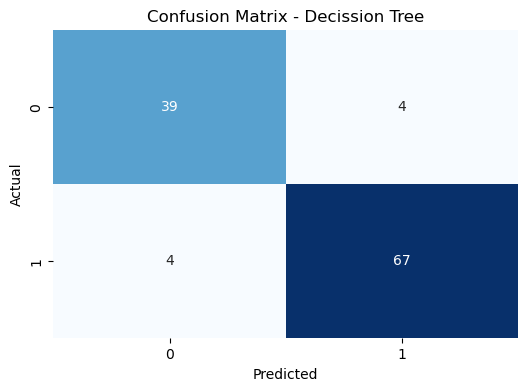

In [27]:
# Confusion Matrix - Decission Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize = (6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - Decission Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

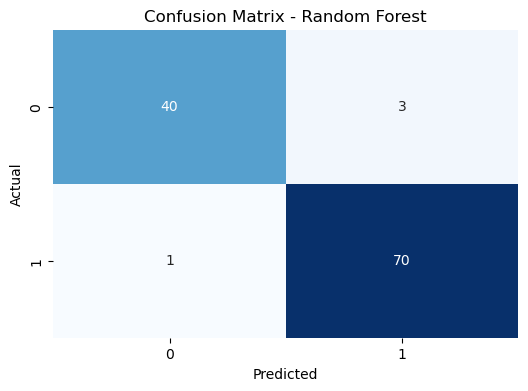

In [28]:
# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize = (6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

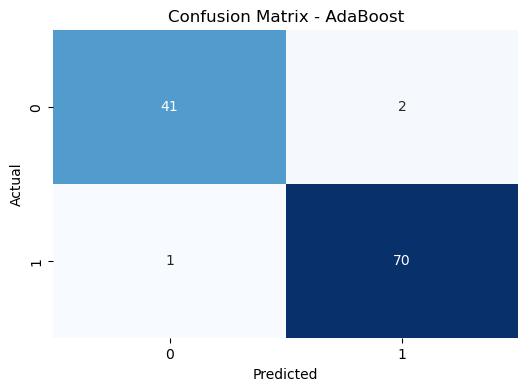

In [29]:
# Confusion Matrix - AdaBoost
cm_ab = confusion_matrix(y_test, y_pred_ab)
plt.figure(figsize = (6,4))
sns.heatmap(cm_ab, annot=True, fmt='d', cmap='Blues', cbar = False)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()